## Analytic Solution (Brute Force)

In [46]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

class GS_Linear:
    def __init__(self, A, eps, kappa, delta):

        self.A = A
        self.eps = eps
        self.kappa = kappa
        self.delta = delta

        self.N1 = (1 + np.arcsin(self.delta)) ** 2 / (self.eps * self.kappa ** 2)
        self.N2 = - (1 - np.arcsin(self.delta)) ** 2 / (self.eps * self.kappa ** 2)
        self.N3 = - self.kappa / (self.eps * np.cos(np.arcsin(self.delta)) ** 2)
        self.get_UX = [self.get_U0,self.get_U1,self.get_U2,self.get_U3,self.get_U4,self.get_U5,self.get_U6,self.get_UP]
   
        # Define Boundary Constraints
        self.get_BCs()
        self.solve_coefficients()   
            
    def psi_func(self, x, y):
        '''
        Input:
        cj: a list of coefficients for each polynomials 
        x: x point to be calculated
        y: y point to be calculated
        Output:
        psi: flux function at a given point for GS w/ Solovev
        '''
        # Get polynomial values for a given point
        UH = np.array([i(x,y) for i in self.get_UX[:-1]])
        cj_UH = UH*self.cj[0]
        return self.get_UP(x,y)+ sum(cj_UH)
        
    def solve_coefficients(self):
        # UH
        self.UH = np.concatenate(([self.BC1[0]], [self.BC2[0]],[self.BC3[0]],[self.BC4[0]], [self.BC5[0]], [self.BC6[0]], [self.BC7[0]]), axis=0) 
        self.UP = np.concatenate(([-1*self.BC1[1]], [-1*self.BC2[1]],[-1*self.BC3[1]],[-1*self.BC4[1]], [-1*self.BC5[1]], [-1*self.BC6[1]], [-1*self.BC7[1]]), axis=0) 
        self.cj = np.linalg.solve(self.UH, self.UP).T
    
    def get_BCs(self):
        # outer point
        x,y = self.outer_point()
        self.BC1 = self.get_point_flux(x,y)
        dUH_dyy, dUP_dyy = self.get_point_curvature_dyy(x,y)
        dUH_dx,  dUP_dx  = self.get_point_slope_dx(x,y)
        self.BC2 = (dUH_dyy + self.N1*dUH_dx, \
                     dUP_dyy + self.N1*dUP_dx)
        # inner point
        x,y = self.inner_point()
        self.BC3 = self.get_point_flux(x,y)
        dUH_dyy, dUP_dyy = self.get_point_curvature_dyy(x,y)
        dUH_dx,  dUP_dx  = self.get_point_slope_dx(x,y)
        self.BC4 = (dUH_dyy + self.N2*dUH_dx, \
                    dUP_dyy + self.N2*dUP_dx)
        # high point
        x,y = self.high_point()
        self.BC5 = self.get_point_flux(x,y)
        self.BC6  = self.get_point_slope_dx(x,y)
        dUH_dxx, dUP_dxx = self.get_point_curvature_dxx(x,y)
        dUH_dy,  dUP_dy  = self.get_point_slope_dy(x,y)
        self.BC7 = (dUH_dxx + self.N3*dUH_dy, \
                      dUP_dxx + self.N3*dUP_dy)
       
    def get_UP(self,x,y):
        return self.A/ 2.0 *  x ** 2 * np.log(x)  + (1 - self.A)/ 8.0 * x ** 4  + y**2*0 
    def get_UP_dx(self,x,y):
        return x*(2.0*self.A*np.log(x)+(1-self.A)*x**2+self.A)/2.0
    def get_UP_dxx(self,x,y):
        return (2*self.A*np.log(x)+(3.0-3.0*self.A)*x**2+3*self.A)/2.0
    def get_UP_dy(self,x,y):
        return 0.0
    def get_UP_dyy(self,x,y):
        return 0.0

    def get_U0(self,x,y):
        return 1.0 + x*0 +y*0
    def get_U0_dx(self,x,y):
        return 0.0 
    def get_U0_dxx(self,x,y):
        return 0.0 
    def get_U0_dy(self,x,y):
        return 0.0 
    def get_U0_dyy(self,x,y):
        return 0.0 
    

    def get_U1(self,x,y):
        return x ** 2 + y*0
    def get_U1_dx(self,x,y):
        return 2.0*x
    def get_U1_dxx(self,x,y):
        return 2.0
    def get_U1_dy(self,x,y):
        return 0.0
    def get_U1_dyy(self,x,y):
        return 0.0

    def get_U2(self,x,y):
        return y ** 2 - x ** 2 * np.log(x) + y*0
    def get_U2_dx(self,x,y):
        return -x*(2.0*np.log(x)+1.0)
    def get_U2_dxx(self,x,y):
        return -2.0 * np.log(x) - 3.0
    def get_U2_dy(self,x,y):
        return x*0 + 2.0*y
    def get_U2_dyy(self,x,y):
        return 2.0 + x*0 +y*0

    def get_U3(self,x,y):
        return x ** 4 - 4.0 * x ** 2 * y ** 2
    def get_U3_dx(self,x,y):
        return 4*x**3-8*y**2*x
    def get_U3_dxx(self,x,y):
        return 12*x**2-8*y**2
    def get_U3_dy(self,x,y):
        return -8.0*x**2*y
    def get_U3_dyy(self,x,y):
        return -8*x**2

    def get_U4(self,x,y):
        return 2.0 * y ** 4 - 9.0 * x ** 2 * y ** 2 - (12.0 * x ** 2 * y ** 2 - 3 * x ** 4) * np.log(x) 
    def get_U4_dx(self,x,y):
        return 3.0*x*((4*x**2-8*y**2)*np.log(x)+x**2-10.0*y**2)
    def get_U4_dxx(self,x,y):
        return (36.0*x**2-24.0*y**2)*np.log(x)+21*x**2-54.0*y**2 
    def get_U4_dy(self,x,y):
        return 8.0*y**3+(-24.0*x**2*np.log(x)-18.0*x**2)*y
    def get_U4_dyy(self,x,y):
        return 24.0*y**2-24*x**2*np.log(x)-18*x**2

    def get_U5(self,x,y):
        return x ** 6 - 12.0 * x ** 4 * y ** 2 + 8.0 * x ** 2 * y ** 4
    def get_U5_dx(self,x,y):
        return 6.0*x**5-48.0*y**2*x**3+16*y**4*x
    def get_U5_dxx(self,x,y):
        return 30*x**4-144*y**2*x**2+16*y**4
    def get_U5_dy(self,x,y):
        return 32.0*x**2*y**3-24.0*x**4*y
    def get_U5_dyy(self,x,y):
        return 96.0*x**2*y**2-24.0*x**4


    def get_U6(self,x,y):
        return 8.0 * y ** 6 - 140 * x ** 2 * y ** 4 + 75.0 * x ** 4 * y ** 2 - (120.0 * x ** 2 * y ** 4 - 180 * x ** 4 * y ** 2 + 15.0 * x ** 6) * np.log(x)
    def get_U6_dx(self,x,y):
        return -5*x*((18.0*x**4 - 144 * y**2*x**2 + 48.0*y**4)*np.log(x)+3.0*x**4-96.0*y**2*x**2+80.0*y**4)
    def get_U6_dxx(self,x,y):
        return (-450.0*x**4+2160*y**2*x**2-240*y**4)*np.log(x)-165.0*x**4+2160*y**2*x**2-640*y**4
    def get_U6_dy(self,x,y):
        return 48.0*y**5+(-480.0*x**2*np.log(x)-560*x**2)*y**3+(360*x**4*np.log(x)+150*x**4)*y
    def get_U6_dyy(self,x,y):
        return 240.0*y**4+(-1440.0*x**2*np.log(x)-1680*x**2)*y**2+(360*x**4*np.log(x)+150*x**4)

    def outer_point(self):
        return 1.0+self.eps, 0.0

    def inner_point(self):
        return 1.0-self.eps, 0.0

    def high_point(self):
        return 1.0-self.delta*self.eps, self.kappa*self.eps

    def get_point_flux(self,x,y):
        U0 = self.get_U0(x,y)
        U1 = self.get_U1(x,y)
        U2 = self.get_U2(x,y)
        U3 = self.get_U3(x,y)
        U4 = self.get_U4(x,y)
        U5 = self.get_U5(x,y)
        U6 = self.get_U6(x,y)
        UH = [U0,U1,U2,U3,U4,U5,U6]
        UP = [self.get_UP(x,y)]
        return np.array(UH), np.array(UP)

    def get_point_slope_dx(self, x,y):
        U0 = self.get_U0_dx(x,y)
        U1 = self.get_U1_dx(x,y)
        U2 = self.get_U2_dx(x,y)
        U3 = self.get_U3_dx(x,y)
        U4 = self.get_U4_dx(x,y)
        U5 = self.get_U5_dx(x,y)
        U6 = self.get_U6_dx(x,y)
        UH = [U0,U1,U2,U3,U4,U5,U6]
        UP = [self.get_UP_dx(x,y)]
        return np.array(UH), np.array(UP)
    def get_point_slope_dy(self, x,y):
        U0 = self.get_U0_dy(x,y)
        U1 = self.get_U1_dy(x,y)
        U2 = self.get_U2_dy(x,y)
        U3 = self.get_U3_dy(x,y)
        U4 = self.get_U4_dy(x,y)
        U5 = self.get_U5_dy(x,y)
        U6 = self.get_U6_dy(x,y)
        UH = [U0,U1,U2,U3,U4,U5,U6]
        UP = [self.get_UP_dy(x,y)]
        return np.array(UH), np.array(UP)
    def get_point_curvature_dyy(self, x,y):
        U0 = self.get_U0_dyy(x,y)
        U1 = self.get_U1_dyy(x,y)
        U2 = self.get_U2_dyy(x,y)
        U3 = self.get_U3_dyy(x,y)
        U4 = self.get_U4_dyy(x,y)
        U5 = self.get_U5_dyy(x,y)
        U6 = self.get_U6_dyy(x,y)
        UH = [U0,U1,U2,U3,U4,U5,U6]
        UP = [self.get_UP_dyy(x,y)]
        return np.array(UH), np.array(UP)
    def get_point_curvature_dxx(self, x,y):
        U0 = self.get_U0_dxx(x,y)
        U1 = self.get_U1_dxx(x,y)
        U2 = self.get_U2_dxx(x,y)
        U3 = self.get_U3_dxx(x,y)
        U4 = self.get_U4_dxx(x,y)
        U5 = self.get_U5_dxx(x,y)
        U6 = self.get_U6_dxx(x,y)
        UH = [U0,U1,U2,U3,U4,U5,U6]
        UP = [self.get_UP_dxx(x,y)]
        return np.array(UH), np.array(UP)


#### Test

In [58]:
# tokamak = GS_Linear(A=-0.155, eps= 2/6.2, kappa=1.6, delta=0.4)
tokamak = GS_Linear(A=-0.155, eps= 0.99, kappa=1.01, delta=0.001)

In [59]:
x_test1 = 1+tokamak.eps
tokamak.A/2*(x_test1)**2*np.log(x_test1)+(1-tokamak.A)/8.0*(x_test1)**4

2.052951492772098

In [60]:
tokamak.get_UP_dyy(x_test1,0)+tokamak.N1*tokamak.get_UP_dx(x_test1,0)

4.151840046113685

In [61]:
tokamak.UP

array([[-2.05295149e+00],
       [-4.15184005e+00],
       [-3.56915127e-05],
       [ 6.28861942e-03],
       [-1.43880735e-01],
       [-4.98516621e-01],
       [-1.49672487e+00]])

#### Visualization

In [62]:
def psi_func(self, x, y):
    '''
    Input:
       cj: a list of coefficients for each polynomials 
       x: x point to be calculated
       y: y point to be calculated
    Output:
       psi: flux function at a given point for GS w/ Solovev
    '''
    # Get polynomial values for a given point
    UH = np.array([i(x,y) for i in self.get_UX[:-1]])
    cj_UH = UH*self.cj[0]
    return self.get_UP(x,y)+ sum(cj_UH)

In [63]:
# make mesh
nx = 100
ny = 100
x, y = np.meshgrid(
    np.linspace(1 - tokamak.eps, 1 + tokamak.eps, nx),
    np.linspace(-tokamak.kappa * tokamak.eps, tokamak.kappa * tokamak.eps, ny),
)
X = np.vstack((np.ravel(x), np.ravel(y))).T

# Calculate corresponding psi
psi = []
for point in X:
    psi.append(tokamak.psi_func(point[0],point[1]))
psi_true = np.reshape(psi, [100, 100])




In [64]:
anchor = [[tokamak.outer_point()[0],tokamak.inner_point()[0],tokamak.high_point()[0]],
            [tokamak.outer_point()[1],tokamak.inner_point()[1],tokamak.high_point()[1]]]

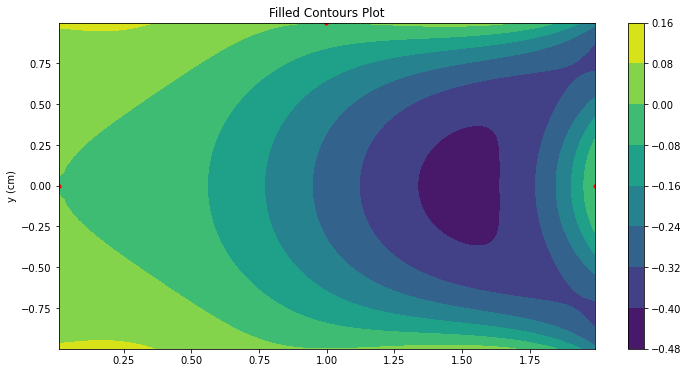

In [65]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
cp = ax.contourf(x, y, psi_true)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.scatter(anchor[0], anchor[1], s = 10,c="red")
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

